<a href="https://colab.research.google.com/github/tracedence/Data-analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle

In [2]:
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
 !kaggle datasets list -s "titanic" 

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
heptapod/titanic                                    Titanic                                         11KB  2017-05-16 08:14:22          40976        781  0.7058824        
azeembootwala/titanic                               Titanic                                         12KB  2017-06-05 12:14:37          13846        149  0.8235294        
brendan45774/test-file                              Titanic dataset                                 11KB  2021-12-02 16:11:42          24114        292  1.0              
rahulsah06/titanic                                  Titanic                                         34KB  2019-09-16 14:43:23           3948     

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 20.1MB/s]


In [6]:
ls

drive/  sample_data/  titanic.zip


In [7]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.shape

(891, 12)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

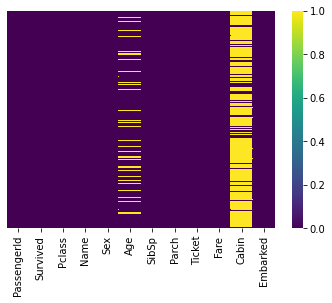

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [28]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

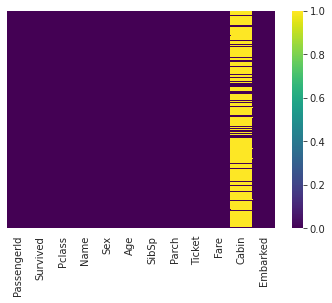

In [29]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

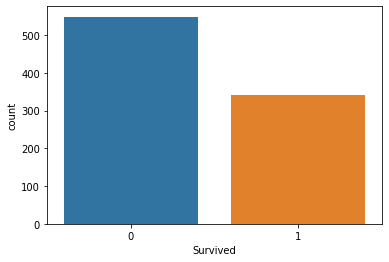

In [15]:
sns.countplot(x="Survived", data=df)

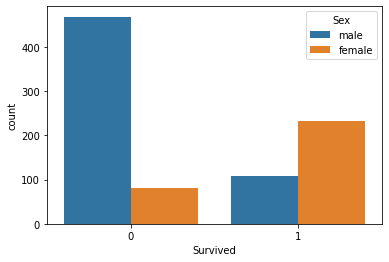

In [17]:
sns.countplot(x="Survived", hue="Sex", data=df)

### Out of survived people, female survived more than male.
### Out of unsurvived poeple, male died more than female

## Survived vs Pclass

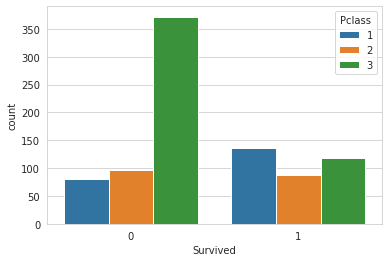

In [20]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=df)

#### First class passengers died very less while third class passenger died more.

## Distribution of age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


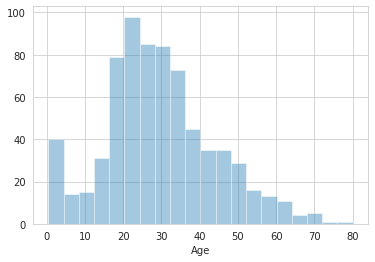

In [23]:
sns.distplot(df["Age"].dropna(), kde=False)

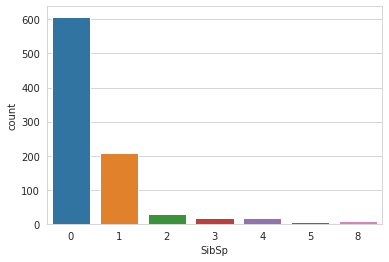

In [24]:
sns.countplot(x="SibSp", data=df)

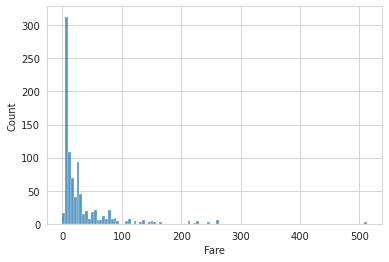

In [25]:
sns.histplot(x="Fare", data=df)

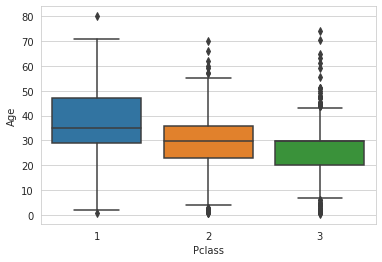

In [31]:
sns.boxplot(x="Pclass", y="Age", data=df)

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
drop_columns = ["PassengerId", "Name", 'Ticket', "Cabin"]

In [53]:
df_new = df.drop(columns=drop_columns)
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [55]:
gender =pd.get_dummies(df_new["Sex"], drop_first=True)
embark = pd.get_dummies(df_new['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [56]:
df_new = df_new.drop(columns=["Sex", "Embarked"])
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [59]:
final_df = pd.concat([df_new, embark, gender], axis=1)
final_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


## standarize data

In [63]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X = std_scaler.fit_transform(final_df.drop("Survived", axis=1))

In [69]:
X.shape

(891, 8)

In [64]:
y = final_df["Survived"]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [68]:
X_train.shape

(623, 8)

## building a Logistic Regression model

In [70]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred = logmodel.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[142,  18],
       [ 37,  71]])

In [76]:
accuracy_score(y_test, y_pred)

0.7947761194029851